<a href="https://colab.research.google.com/github/silviazandoli/explanaible_ai/blob/master/4_Fifa_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier


Chapter 4 - Model Agnostic Methods

gianfagna_l_di_cecco_a_explainable_ai_with_python (Book)

In [42]:
#download dataset here
#https://www.kaggle.com/datasets/mathan/fifa-2018-match-statistics
fifa = pd.read_csv('FIFA 2018 Statistics.csv')
fifa

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [43]:
"""y = (fifa['Man of the Match'] == "Yes") # Convert from string "Yes"/"No" to binary
feature_names = [i for i in fifa.columns if fifa[i].dtype in [np.int64]]
X = fifa[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(train_X, train_y)
X.head()"""

y = (fifa['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in fifa.columns if fifa[i].dtype in [np.int64]]
X = fifa[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(train_X, train_y)

In [ ]:
feature_names

['Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Goals in PSO']

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=574cf03bd25bcd8e7e5d44dca302fb802fefb84bf76c3885f7bf63cc42b8c30e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [44]:
import eli5 #A
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y) #B
eli5.show_weights(perm, feature_names = val_X.columns.tolist())
#C
#A Here we Import eli5 library
#B Train The permutation importance model on the validation set
#C Show the feature importance

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


Goal Scored is the most
important feature that our Random Forest ML model uses to predict if the team will
have or not the Player of The Match prize.

The negative values are a case of bad generalization; so
more in detail, the negative values are a form of overfittin. Let's check this doing the permutation on the training set

In [45]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(my_model, random_state=1).fit(train_X,train_y) #A
eli5.show_weights(perm, feature_names = val_X.columns.tolist())
#A Here we train the Permutation Importance model on the train set

Weight,Feature
0.1375 ± 0.0243,Goal Scored
0.0187 ± 0.0156,Attempts
0.0104 ± 0.0132,Free Kicks
0.0104 ± 0.0000,Blocked
0.0083 ± 0.0083,Distance Covered (Kms)
0.0062 ± 0.0102,Pass Accuracy %
0.0062 ± 0.0102,On-Target
0.0042 ± 0.0102,Ball Possession %
0.0021 ± 0.0083,Fouls Committed
0.0021 ± 0.0083,Passes


The table confirms our idea: this time we don’t have any negative value on the
train set, and “goal scored” is confirmed as the most important feature that affects
the output.

Ora bisogna rispondere alla domanda "How", The table confirms our idea: this time we don’t have any negative value on the
train set, and “goal scored” is confirmed as the most important feature that affects
the output.

In [ ]:
!pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 14.2 MB/s eta 0:00:00


In [ ]:
feature_names

['Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Goals in PSO']

In [ ]:
print(feature_names)

['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked\tCorners', 'Offsides', 'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', 'Goals in PSO']


Diverso dal libro, è questa la nuova versione e corretta

In [51]:
""" from pdpbox import pdp, info_plots #A
feature_to_plot = 'Goal Scored' #B
pdp_dist = pdp.PDPIsolate(my_model, val_X, feature_names,feature_to_plot,'scored')

fig, axes = pdp_dist.plot(
    center=True,
    plot_lines=True,
    frac_to_plot=1,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True, "line": {"hl_color": "#f46d43"}},
    engine='plotly',
    template='plotly_white',
)
fig
#pdp.pdp_plot(pdp_dist, feature_to_plot)
#plt.show()
#A Import from the pdpbox library
#B We select the ‘Goal scored’ feature"""

#Error it does not plot the figure... issue to be checked... I used another library
#non eseguire questa se esegui l'altro codice dell'altra libreria, altrimenti ti darà errore anche nell'altro

' from pdpbox import pdp, info_plots #A\nfeature_to_plot = \'Goal Scored\' #B\npdp_dist = pdp.PDPIsolate(my_model, val_X, feature_names,feature_to_plot,\'scored\')\n\nfig, axes = pdp_dist.plot(\n    center=True,\n    plot_lines=True,\n    frac_to_plot=1,\n    cluster_method=\'accurate\',\n    plot_pts_dist=True,\n    to_bins=False,\n    show_percentile=False,\n    which_classes=None,\n    figsize=None,\n    dpi=300,\n    ncols=2,\n    plot_params={"pdp_hl": True, "line": {"hl_color": "#f46d43"}},\n    engine=\'plotly\',\n    template=\'plotly_white\',\n)\nfig\n#pdp.pdp_plot(pdp_dist, feature_to_plot)\n#plt.show()\n#A Import from the pdpbox library\n#B We select the ‘Goal scored’ feature'

Diverso dal libro, guarda qui https://www.kaggle.com/code/dansbecker/partial-plots
usa un'altra libreria per i partial plots, l'altra non va

Partial Dependence Plot diagram that shows how “Goal Scored” influences the prediction

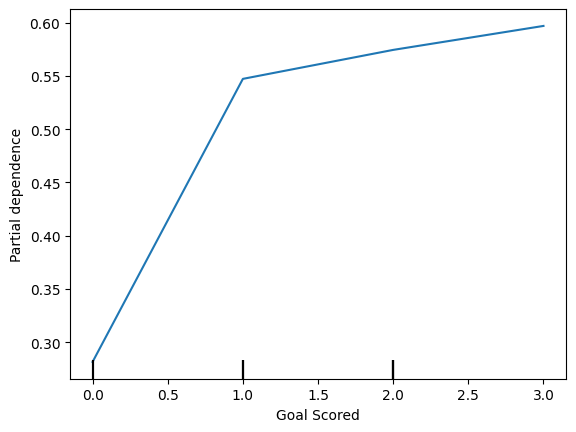

In [46]:
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Create and plot the data
disp1 = PartialDependenceDisplay.from_estimator(my_model, val_X, ['Goal Scored'])
plt.show()
#ps: s

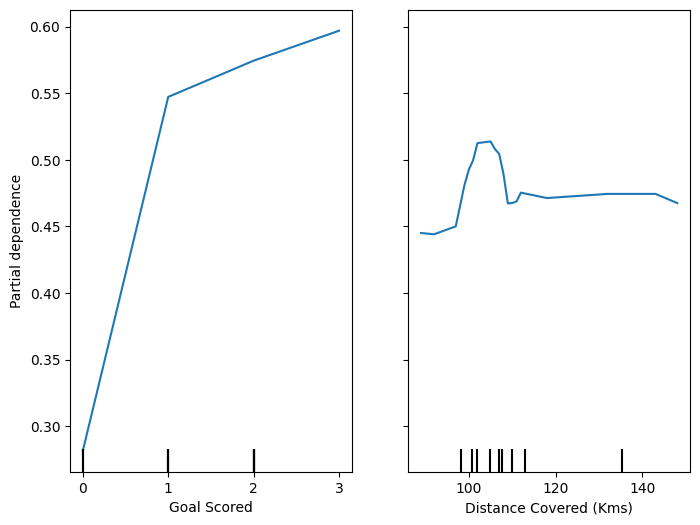

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
f_names = ['Goal Scored', 'Distance Covered (Kms)']
# Similar to previous PDP plot except we use tuple of features instead of single feature
disp4 = PartialDependenceDisplay.from_estimator(my_model, val_X, f_names, ax=ax)
plt.show()

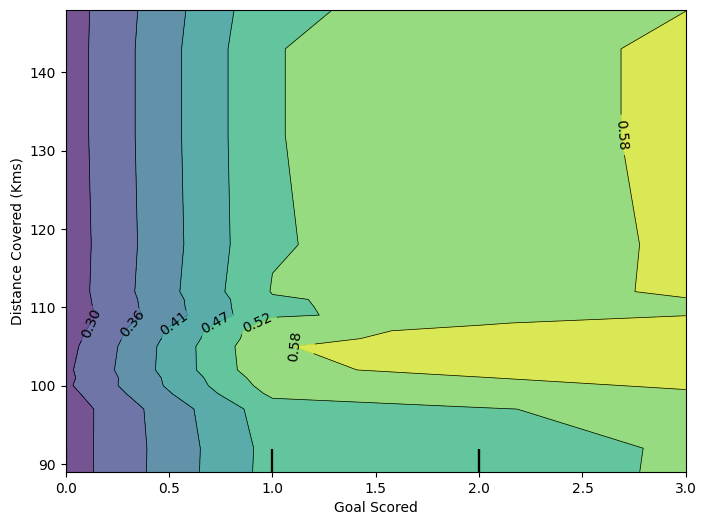

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('Goal Scored', 'Distance Covered (Kms)')]
# Similar to previous PDP plot except we use tuple of features instead of single feature
disp4 = PartialDependenceDisplay.from_estimator(my_model, val_X, f_names, ax=ax)
plt.show()

Looking at the single diagram of goal scored, it seems there is just a slight
variation above one goal; here we see that there is a clear area of best values
(yellow area). Also, it is confirmed that the maximum effect from distance covered is achieved around 100 km, but with more goals also longer distances produce the same overall effect.

In [50]:
"""from pdpbox import pdp, info_plots

features_to_plot = [('Goal Scored', 'Distance Covered (Kms)')]
inter1 = pdp.PDPInteract(my_model, val_X,feature_names, features_to_plot,) #A
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot)
plt.show()"""
#A PDP for feature interaction

#not use it

"from pdpbox import pdp, info_plots\n\nfeatures_to_plot = [('Goal Scored', 'Distance Covered (Kms)')]\ninter1 = pdp.PDPInteract(my_model, val_X,feature_names, features_to_plot,) #A\npdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot)\nplt.show()"

Non c'entra

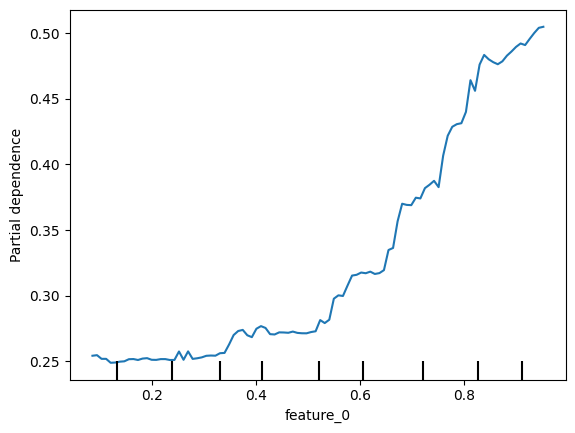

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from matplotlib import pyplot as plt

# Generate dummy data
np.random.seed(42)
n_samples = 1000
n_features = 15

dummy_data = np.random.rand(n_samples, n_features)
dummy_target = (dummy_data[:, 0] + dummy_data[:, 1] + np.random.randn(n_samples)) > 1.5

feature_names = [f'feature_{i}' for i in range(n_features)]
dummy_df = pd.DataFrame(dummy_data, columns=feature_names)
dummy_df['target'] = dummy_target

# Split data
X = dummy_df.drop('target', axis=1)
y = dummy_df['target']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Train a model
my_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(train_X, train_y)

# Create and plot the data
disp1 = PartialDependenceDisplay.from_estimator(my_model, val_X, ['feature_0'])
plt.show()
